<a href="https://colab.research.google.com/github/sahilpokhriyal/cv/blob/main/Assignment_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

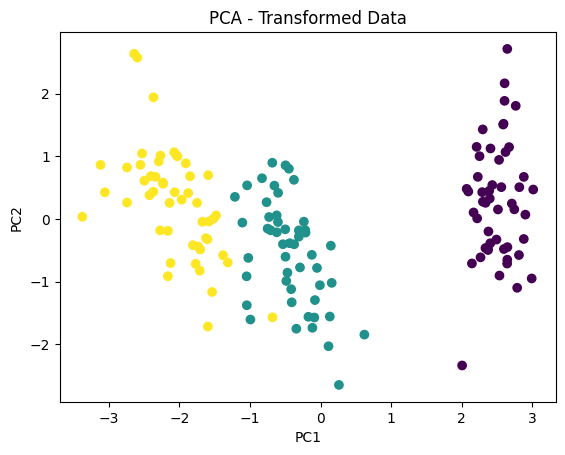

In [9]:
import numpy as np

# Step 1: Load the dataset
iris_data = []
with open("Iris Dataset.csv", "r") as file:
    lines = file.readlines()
    for line in lines:
        iris_data.append(line.strip().split(','))

# Step 2: Data preprocessing
# Label encoding
label_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
for i in range(1, len(iris_data)):
    iris_data[i][-1] = label_mapping[iris_data[i][-1]]

# Step 3: PCA
# Extract the features and target variable
X = np.array([instance[:-1] for instance in iris_data[1:]], dtype=float)
y = np.array([instance[-1] for instance in iris_data[1:]], dtype=int)

# Step 3.1: Standardize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Step 3.2: Compute the covariance matrix
cov_matrix = np.cov(X.T)

# Step 3.3: Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 3.4: Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 3.5: Select the top k eigenvectors
k = 2  # Number of components to keep
selected_eigenvectors = eigenvectors[:, :k]

# Step 3.6: Transform the data
transformed_data = X.dot(selected_eigenvectors)

# Step 4: Visualize the transformed data
import matplotlib.pyplot as plt

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Transformed Data')
plt.show()


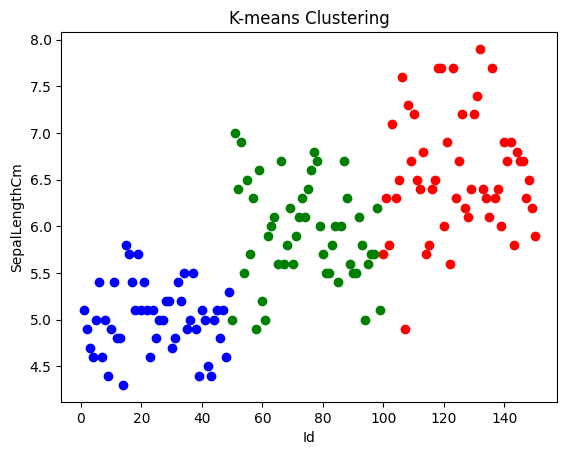

In [11]:
import csv
import random

# Step 1: Load the dataset
iris_data = []
with open("Iris Dataset.csv", "r") as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        iris_data.append(row)

# Step 2: Data preprocessing
# Remove the header
header = iris_data[0]
iris_data = iris_data[1:]

# Convert numerical values to float
for i in range(len(iris_data)):
    for j in range(len(iris_data[i])-1):
        iris_data[i][j] = float(iris_data[i][j])

# Step 3: Implement K-means clustering
def euclidean_distance(p1, p2):
    return sum([(x-y)**2 for x, y in zip(p1, p2)]) ** 0.5

def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        distances = [euclidean_distance(point[:-1], centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters

def update_centroids(clusters):
    centroids = []
    for cluster in clusters:
        centroid = [sum(x) / len(x) for x in zip(*cluster)]
        centroids.append(centroid)
    return centroids

def kmeans_clustering(data, k, max_iterations):
    # Step 3.1: Initialize centroids randomly
    centroids = random.sample(data, k)

    for _ in range(max_iterations):
        # Step 3.2: Assign data points to clusters
        clusters = assign_clusters(data, centroids)

        # Step 3.3: Update centroids
        centroids = update_centroids(clusters)

    return clusters, centroids

# Convert target labels to numeric values
label_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
for i in range(len(iris_data)):
    iris_data[i][-1] = label_mapping[iris_data[i][-1]]

# Step 4: Perform K-means clustering
k = 3  # Number of clusters
max_iterations = 100  # Maximum number of iterations
clusters, centroids = kmeans_clustering(iris_data, k, max_iterations)

# Step 5: Visualize the clusters
colors = ['red', 'green', 'blue']
for i, cluster in enumerate(clusters):
    cluster = [point[:-1] for point in cluster]
    cluster = list(zip(*cluster))
    plt.scatter(cluster[0], cluster[1], color=colors[i])

plt.xlabel(header[0])
plt.ylabel(header[1])
plt.title('K-means Clustering')
plt.show()
